### Life Expectancy EDA
- Kaggle 'Life Expectancy (WHO)'
    - https://www.kaggle.com/kumarajarshi/life-expectancy-who

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from PIL import Image as pil
import seaborn as sns

pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

In [7]:
PATH = '../datas/'
original = pd.read_csv(PATH + 'life_expectancy_data_fillna.csv')
original.columns = [cols.upper() for cols in original.columns.tolist()]
original.head()

,COUNTRYCODE,ISO3166,COUNTRY,YEAR,STATUS,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,BMI,UNDER_FIVE_DEATHS,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_1_19_YEARS,THINNESS_5_9_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING,REGION,INCOMEGROUP
0,AFG,4,Afghanistan,2000,Developing,54.8,321,90.2,0.01,0.00,62.0,6532,12.2,122,24,8.20,24,0.1,3.728477e+09,20779953,2.3,2.5,0.338,5.5,South Asia,Low income
1,AFG,4,Afghanistan,2001,Developing,55.3,316,87.6,0.01,0.00,63.0,8762,12.6,122,35,7.80,33,0.1,3.876869e+09,21606988,2.1,2.4,0.340,5.9,South Asia,Low income
2,AFG,4,Afghanistan,2002,Developing,56.2,3,84.9,0.01,9.44,64.0,2486,13.0,122,36,7.76,36,0.1,4.055180e+09,22600770,19.9,2.2,0.341,6.2,South Asia,Low income
3,AFG,4,Afghanistan,2003,Developing,56.7,295,82.3,0.01,8.94,65.0,798,13.4,122,41,8.82,41,0.1,4.515559e+09,23680871,19.7,19.9,0.373,6.5,South Asia,Low income
4,AFG,4,Afghanistan,2004,Developing,57.0,293,79.6,0.02,9.81,67.0,466,13.8,120,5,8.79,5,0.1,5.226779e+09,24726684,19.5,19.7,0.381,6.8,South Asia,Low income


### Heatmap
- 각 컬럼별 상관관계 확인하기

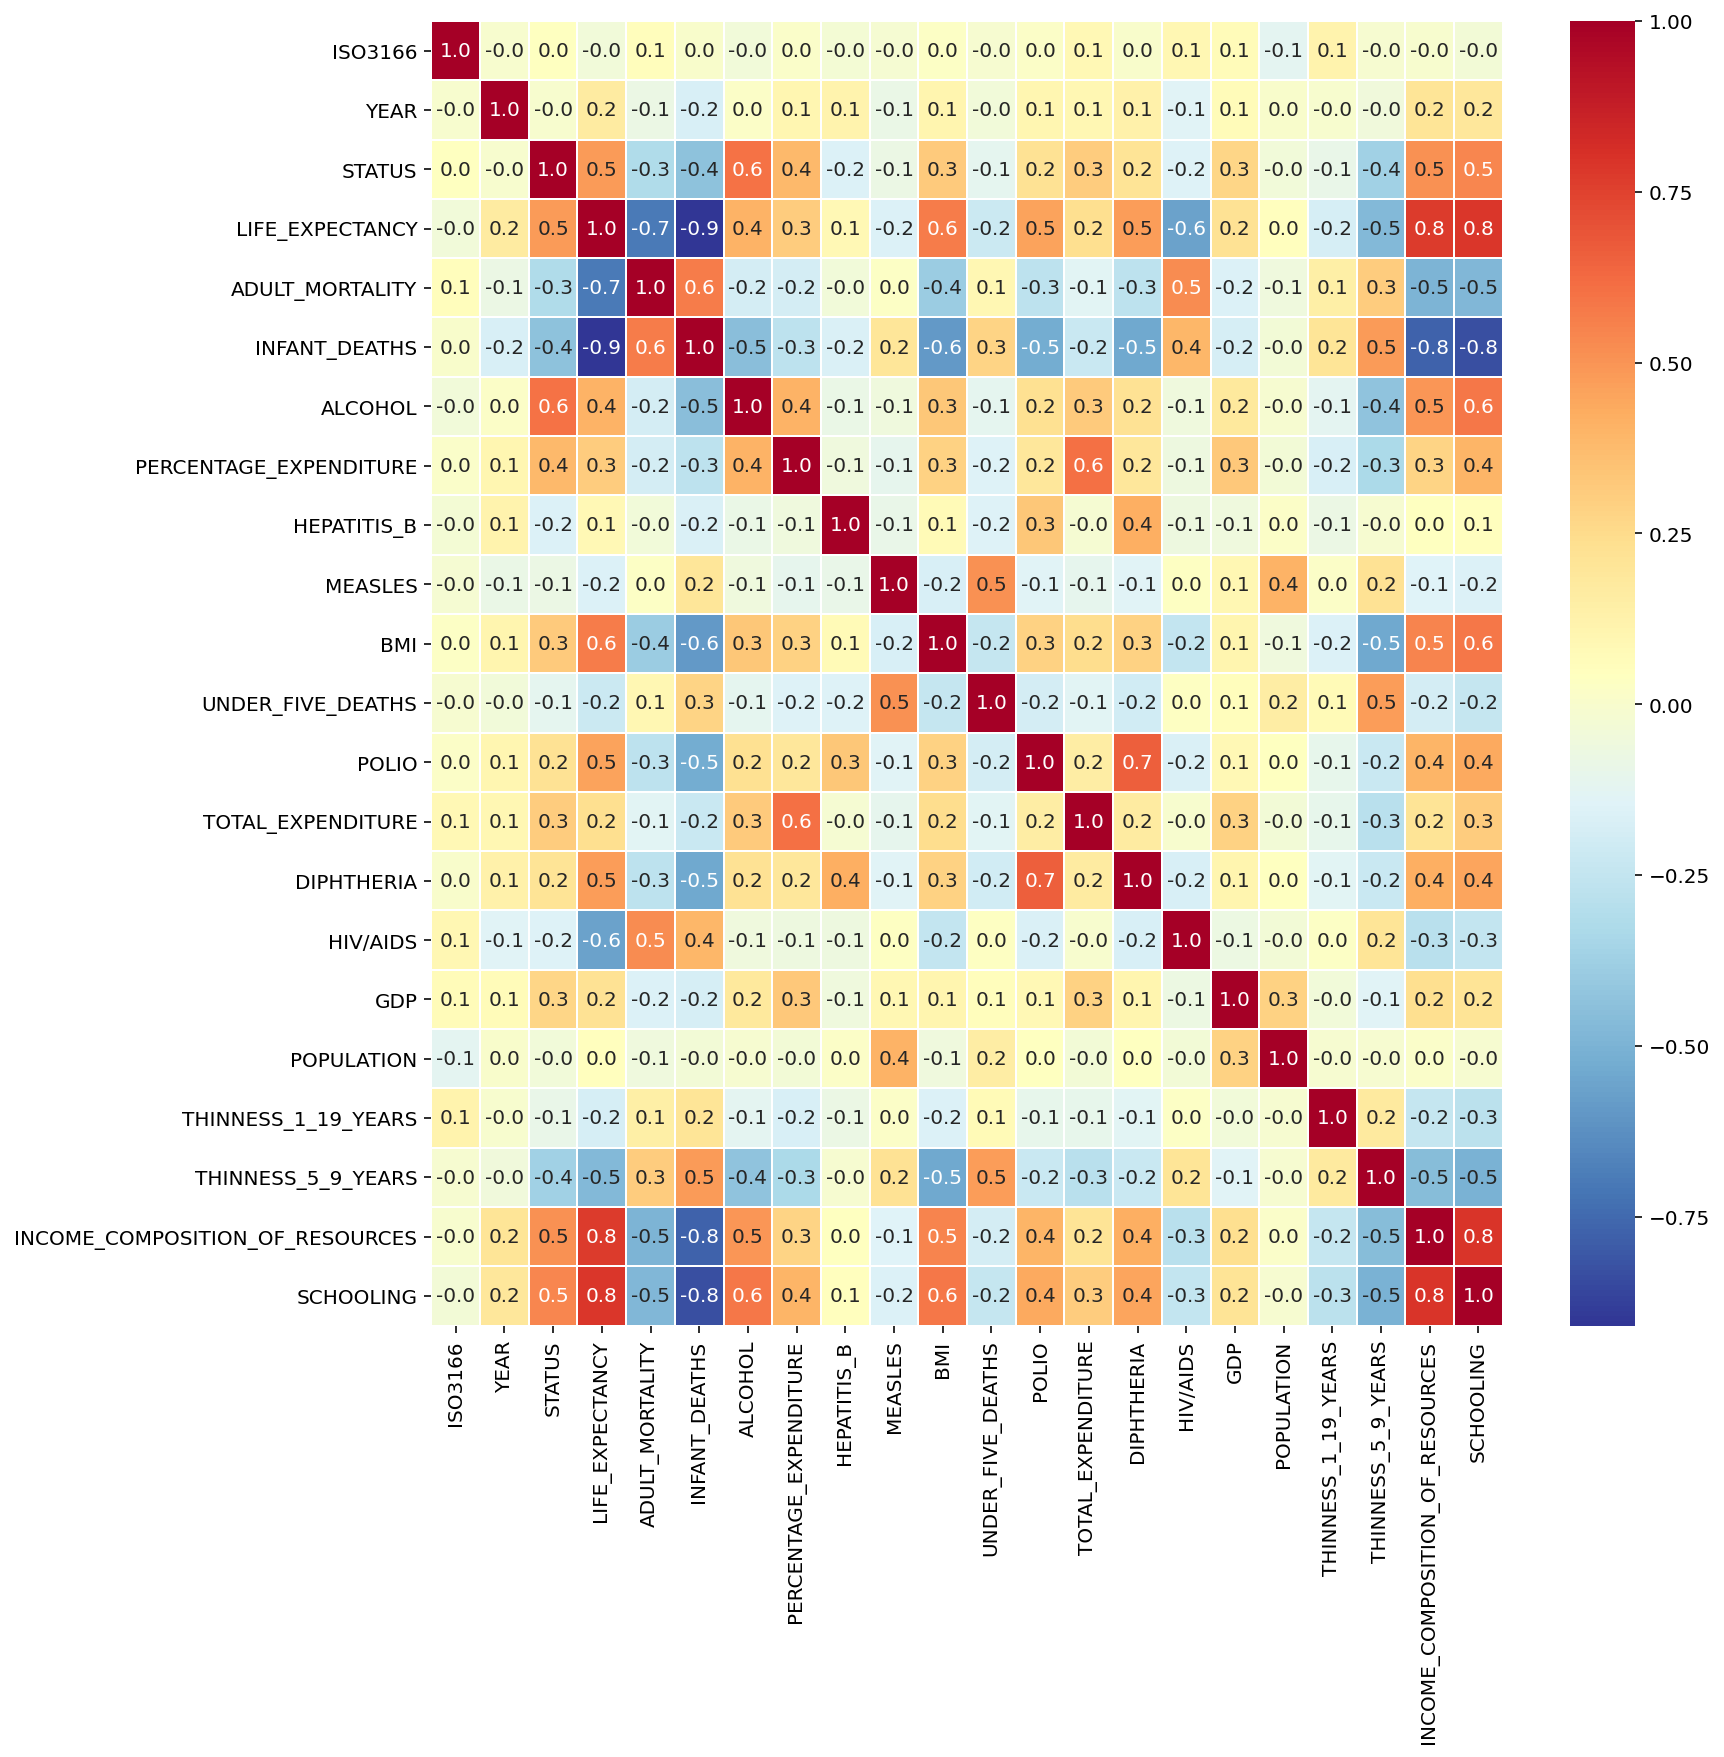

In [8]:
# Developing: 0, developed: 1
original["STATUS"] = [row.replace("Developing","0") for row in original["STATUS"].tolist()]
original["STATUS"] = [row.replace("Developed","1") for row in original["STATUS"].tolist()]
original["STATUS"] = [int(row) for row in original["STATUS"].tolist()]

plt.figure(figsize=(12,12))
sns.heatmap(original.corr(), annot=True, fmt='.1f', linewidths=0.5, cmap='RdYlBu_r');

- 각 컬럼별 연도에 따른 추이

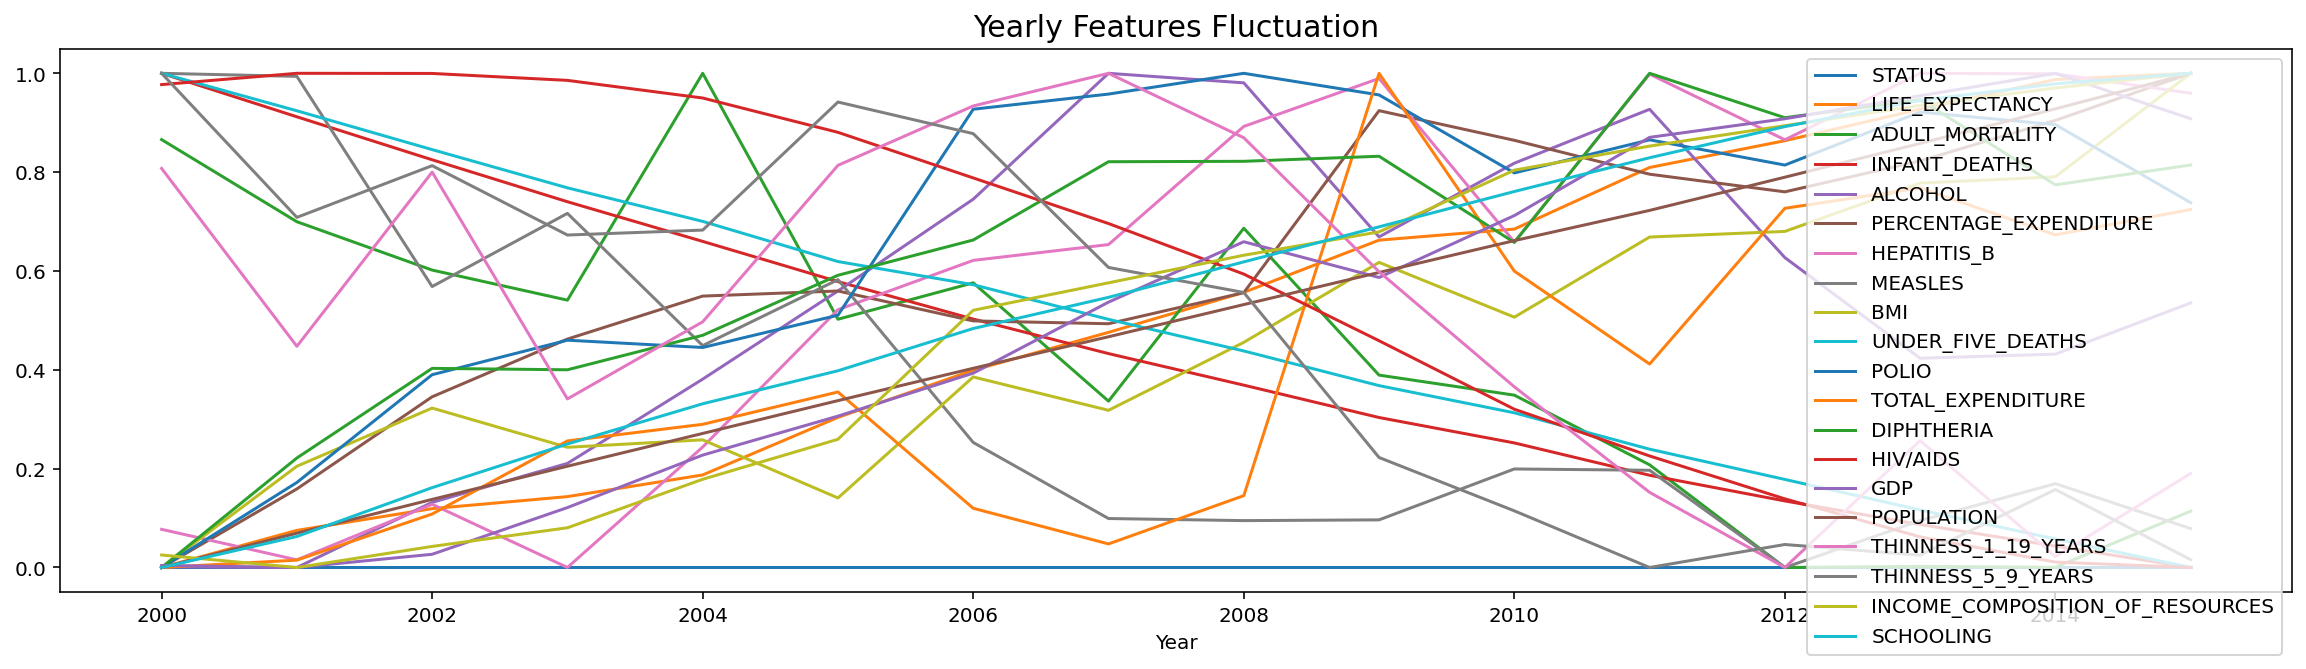

In [9]:
# 연도별로 groupby
year_data = original.groupby("YEAR").mean()
# ISO3166 컬럼 제외
year_data = year_data[year_data.columns.tolist()[1:]]

plt.figure(figsize=(20, 5))
plt.title("Yearly Features Fluctuation", fontsize= 15)
for a in year_data.columns.tolist():
    plt.plot(year_data.index, preprocessing.minmax_scale(year_data[a]), label=a)
    
plt.xlabel("Year")
plt.legend()
plt.show()

In [12]:
# mix-max scaling
scaled_year_data = pd.DataFrame(preprocessing.minmax_scale(year_data))
scaled_year_data.index = year_data.index
scaled_year_data.columns = year_data.columns.tolist()

# 대분류 카테고리로 컬럼 나누기
cat = {'economy': ['PERCENTAGE_EXPENDITURE', 'TOTAL_EXPENDITURE', 'GDP', 'POPULATION','INCOME_COMPOSITION_OF_RESOURCES'],
        'death_rate': ['INFANT_DEATHS', "ADULT_MORTALITY",'UNDER_FIVE_DEATHS'],
       'illness_rate': ['THINNESS_1_19_YEARS','THINNESS_5_9_YEARS', 'MEASLES', 'HIV/AIDS'],
        'vaccine': ['HEPATITIS_B','POLIO','DIPHTHERIA'],
        'others':['SCHOOLING','BMI', 'ALCOHOL']}

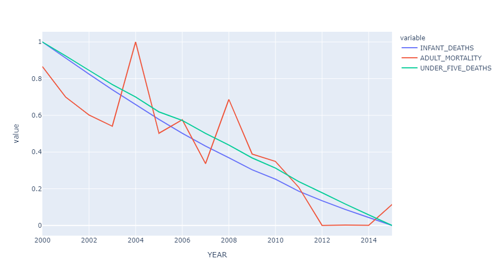

In [30]:
image= pil.open('../imgs/yearly_death.png')
image.thumbnail((500, 700))
image